# Arxiv Papers
[source](https://arxiv.org/help/bulk_data)

In [29]:
import urllib.request

url = 'http://export.arxiv.org/api/query?search_query=all:electron&start=0&max_results=10'
data = urllib.request.urlopen(url).read().strip()

# Arxiv Scraper Library

[Arxiv Scraper](https://github.com/mahdisadjadi/arxivscraper)

In [105]:
import os
import pandas as pd
import numpy as np
from collections import defaultdict

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

DIR_PATH = '/home/anneke/Documents/ann-mitchell-text-classification/dataset/arxiv/'

In [108]:
tot = []
for root, dirs, files in os.walk(DIR_PATH, topdown=False):
    for name in files:
        df = pd.read_csv(os.path.join(root, name))
        tot.append(len(df))

In [161]:
# Reference : https://arxiv.org/archive/cs

cs_arxiv_cat = {}

cs_arxiv_cat['cs.ai'] = 'Artificial Intelligence'
cs_arxiv_cat['cs.cl'] = 'Computation and Language'
cs_arxiv_cat['cs.cc'] = 'Computational Complexity'
cs_arxiv_cat['cs.ce'] = 'Computational Engineering, Finance, and Science'
cs_arxiv_cat['cs.cg'] = 'Computational Geometry'
cs_arxiv_cat['cs.gt'] = 'Computer Science and Game Theory'
cs_arxiv_cat['cs.cv'] = 'Computer Vision and Pattern Recognition'
cs_arxiv_cat['cs.cy'] = 'Computers and Society'
cs_arxiv_cat['cs.cr'] = 'Cryptography and Security'
cs_arxiv_cat['cs.ds'] = 'Data Structures and Algorithms'
cs_arxiv_cat['cs.db'] = 'Databases'
cs_arxiv_cat['cs.dl'] = 'Digital Libraries'
cs_arxiv_cat['cs.dm'] = 'Discrete Mathematics'
cs_arxiv_cat['cs.dc'] = 'Distributed, Parallel, and Cluster Computing'
cs_arxiv_cat['cs.et'] = 'Emerging Technologies'
cs_arxiv_cat['cs.fl'] = 'Formal Languages and Automata Theory'
cs_arxiv_cat['cs.et'] = 'Emerging Technologies'
cs_arxiv_cat['cs.gl'] = 'General Literature'
cs_arxiv_cat['cs.gr'] = 'Graphics'
cs_arxiv_cat['cs.ar'] = 'Hardware Architecture'
cs_arxiv_cat['cs.hc'] = 'Human-Computer Interaction'
cs_arxiv_cat['cs.ir'] = 'Information Retrieval'
cs_arxiv_cat['cs.it'] = 'Information Theory'
cs_arxiv_cat['cs.lo'] = 'Logic in Computer Science'
cs_arxiv_cat['cs.lg'] = 'Machine Learning'
cs_arxiv_cat['cs.ms'] = 'Mathematical Software'
cs_arxiv_cat['cs.ma'] = 'Multiagent Systems'
cs_arxiv_cat['cs.mm'] = 'Multimedia'
cs_arxiv_cat['cs.ni'] = 'Networking and Internet Architecture'
cs_arxiv_cat['cs.ne'] = 'Neural and Evolutionary Computing'
cs_arxiv_cat['cs.na'] = 'Numerical Analysis'
cs_arxiv_cat['cs.os'] = 'Operating Systems'
cs_arxiv_cat['cs.oh'] = 'Other Computer Science'
cs_arxiv_cat['cs.pf'] = 'Performance'
cs_arxiv_cat['cs.pl'] = 'Programming Languages'
cs_arxiv_cat['cs.ro'] = 'Robotics'
cs_arxiv_cat['cs.si'] = 'Social and Information Networks'
cs_arxiv_cat['cs.se'] = 'Software Engineering'
cs_arxiv_cat['cs.sd'] = 'Sound'
cs_arxiv_cat['cs.sc'] = 'Symbolic Computation'
cs_arxiv_cat['cs.sy'] = 'Systems and Control'

## Data distribution analysis

### By year

In [16]:
year = ['20{:02d}'.format(i) for i in range(9,20)]
year

['2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

In [39]:
year_paper_count = dict()

for y in year:
    year_paper_count[y] = 0
    ABS_PATH = os.path.abspath(os.path.join(DIR_PATH, y))
    dir_list = os.listdir(ABS_PATH)
    for d in dir_list:
        data = pd.read_csv(os.path.join(ABS_PATH, d))
        year_paper_count[y] += len(data)

In [44]:
df_year = pd.DataFrame({'year': year, 'count':[year_paper_count[y] for y in year]})

## Note that 2019 is only for 6 months span

In [132]:

# Per categories
# TODO : count each categories. Use Python Counter
categories_count = defaultdict(int)

for y in year:
    year_paper_count[y] = 0
    ABS_PATH = os.path.abspath(os.path.join(DIR_PATH, y))
    dir_list = os.listdir(ABS_PATH)
    for d in dir_list:
        data = pd.read_csv(os.path.join(ABS_PATH, d))
        # categories
        data = data['categories']
        for d in data:
            for w in d.split(' '):
                if 'physics' not in w:
                    if 'cs.' in w:
                        categories_count[w] += 1


In [165]:
categories = sorted(categories_count.items(), key=lambda x:x[1], reverse=True)
categories = [(cs_arxiv_cat[x[0].lower()], x[1]) for x in categories]

df_categories = pd.DataFrame({'category':[c[0] for c in categories[:10]],
                             'count':[c[1] for c in categories[:10]]})

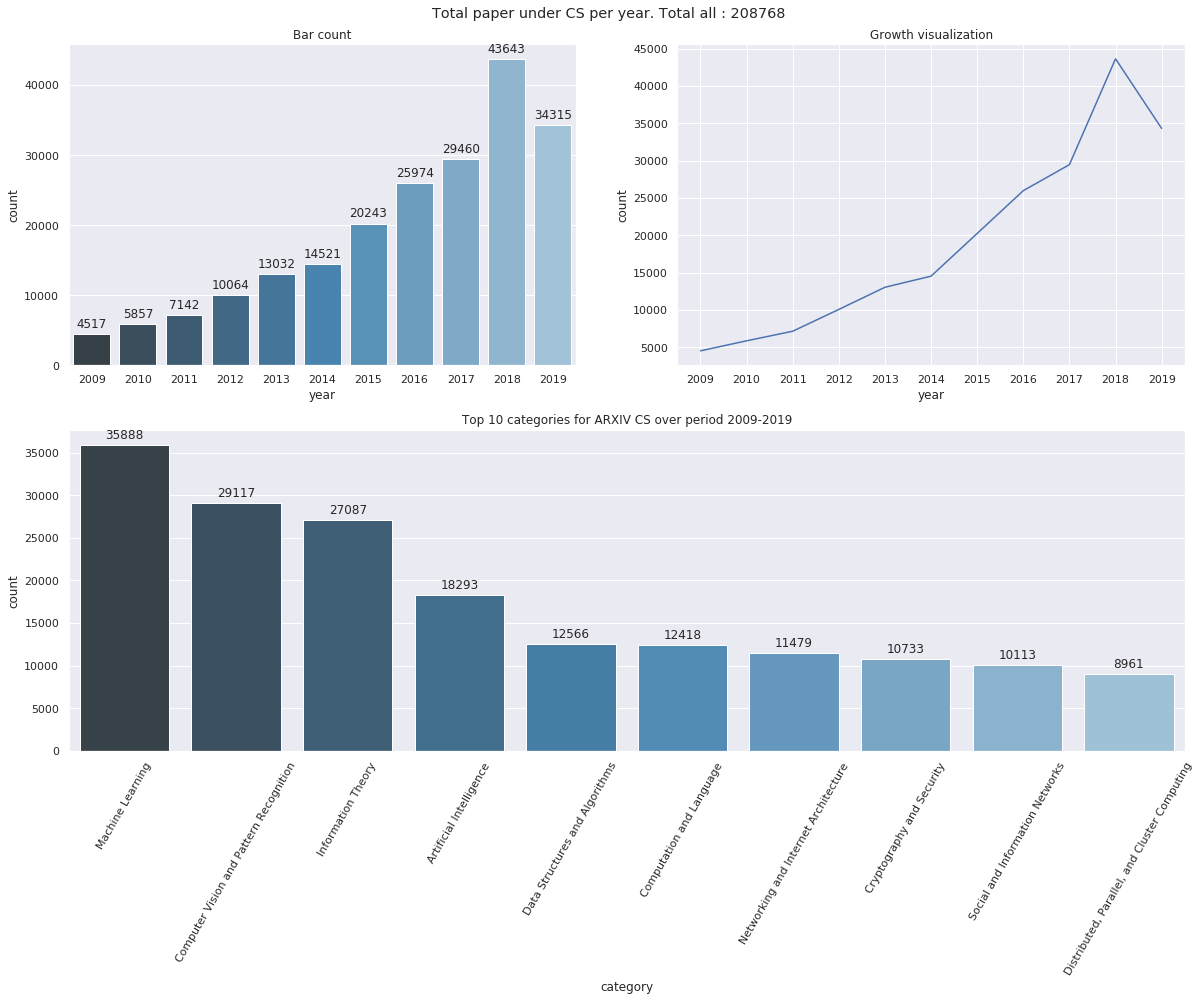

In [195]:
plt.figure(figsize=(20,13))
plt.suptitle('Total paper under CS per year. Total all : {}'.format(np.sum(tot)), y=.92)

sub = plt.subplot(2, 2, 1)
sub.set_title('Bar count')
ax = sns.barplot(x="year", y="count", data=df_year, palette="Blues_d")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

sub = plt.subplot(2, 2, 2)  
sub.set_title('Growth visualization')
ax = sns.lineplot(x="year", y="count", data=df_year)

sub = plt.subplot(2,1,2)
sub.set_title('Top 10 categories for ARXIV CS over period 2009-2019')
ax = sns.barplot(x="category", y="count", data=df_categories, palette="Blues_d")
ax.set_xticklabels(rotation=60, labels=df_categories['category'])
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Test Machine Learning VS Computer Vision
### Data split on (1./3) 